# 数据规整化：清理、转换、合并、重塑
- 利用Python进行数据分析 第七章

In [132]:
from pandas import DataFrame,Series
import pandas as pd

import numpy as np
from IPython.display import Image

import re

## 一、合并数据集
* 合并（merge）、链接（join）

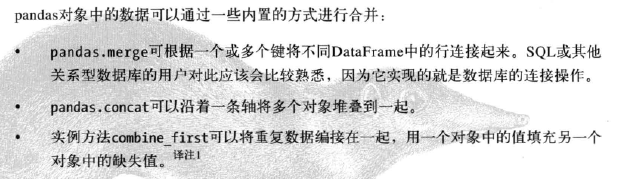

In [3]:
Image(filename="picture\Combining and Merging Data Sets.png")

### 1 数据库风格的DataFrame合并

In [11]:
df1 = DataFrame({'key':['b','b','a','c','a','a','b'],
                'data1':range(7)})
df2 = DataFrame({'key':['a','b','d'],
                'data2':range(3)})
print df1
print df2

print pd.merge(df1,df2) # 重叠的列名当做键
print pd.merge(df1,df2,on = 'key')
print pd.merge(df1,df2,how = 'outer') # 默认是 inner（交集），还有outer（并集）、left、right

   data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   a
6      6   b
   data2 key
0      0   a
1      1   b
2      2   d
   data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0
   data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0
   data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0
6      3   c    NaN
7    NaN   d      2


In [10]:
df1 = DataFrame({'key1':['b','b','a','c','a','a','b'],
                'data1':range(7)})
df2 = DataFrame({'key2':['a','b','d'],
                'data2':range(3)})
print df1
print df2
print pd.merge(df1,df2,left_on = 'key1',right_on = 'key2')

   data1 key1
0      0    b
1      1    b
2      2    a
3      3    c
4      4    a
5      5    a
6      6    b
   data2 key2
0      0    a
1      1    b
2      2    d
   data1 key1  data2 key2
0      0    b      1    b
1      1    b      1    b
2      6    b      1    b
3      2    a      0    a
4      4    a      0    a
5      5    a      0    a


In [14]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
 'key2': ['one', 'two', 'one'],
 'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
 'key2': ['one', 'one', 'one', 'two'],
 'rval': [4, 5, 6, 7]})

print pd.merge(left, right, on=['key1', 'key2'], how='outer') # 根据多个键进行合并
print pd.merge(left, right, on='key1', suffixes=('_left', '_right')) # 修改相同的键名

  key1 key2  lval  rval
0  foo  one     1     4
1  foo  one     1     5
2  foo  two     2   NaN
3  bar  one     3     6
4  bar  two   NaN     7
  key1 key2_left  lval key2_right  rval
0  foo       one     1        one     4
1  foo       one     1        one     5
2  foo       two     2        one     4
3  foo       two     2        one     5
4  bar       one     3        one     6
5  bar       one     3        two     7


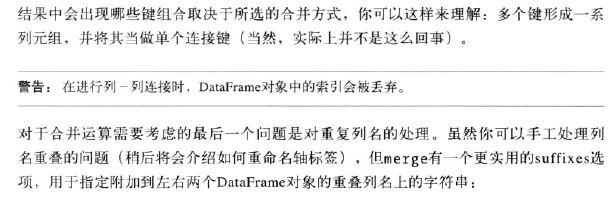

In [15]:
Image(filename="picture\Combining and Merging Data Sets 2.png")

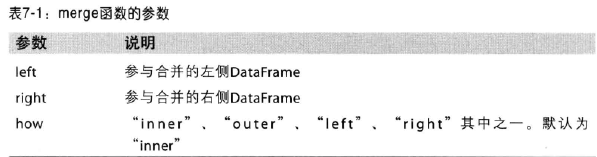

In [17]:
Image(filename="picture\Combining and Merging Data Sets 3.png")

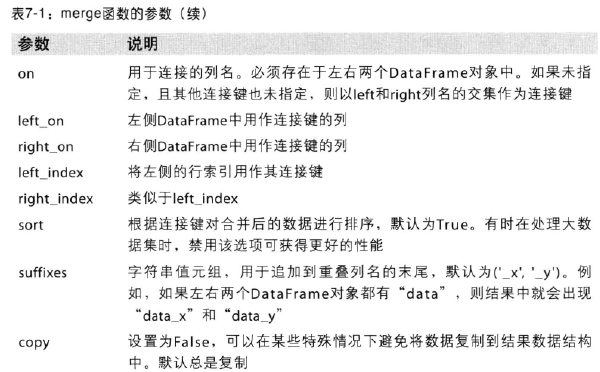

In [16]:
Image(filename="picture\Combining and Merging Data Sets 4.png")

### 2 索引上的合并

In [20]:
left1 = DataFrame({'key':['a','b','a','a','b','c'],
                'value':range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

print left1
print right1

print pd.merge(left1, right1, left_on='key', right_index=True)
print pd.merge(left1, right1, left_on='key', right_index=True,how='outer')

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0
  key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
  key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
5   c      5        NaN



In [26]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
 'key2': [2000, 2001, 2002, 2001, 2002],
 'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)),
 index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
 [2001, 2000, 2000, 2000,2001, 2002]],
 columns=['event1', 'event2'])

print lefth
print righth

print pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True) # 注意重复索引的处理
print pd.merge(lefth, righth, left_on=['key1', 'key2'],right_index=True, how='outer')

   data    key1  key2
0     0    Ohio  2000
1     1    Ohio  2001
2     2    Ohio  2002
3     3  Nevada  2001
4     4  Nevada  2002
             event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11
   data    key1  key2  event1  event2
0     0    Ohio  2000       4       5
0     0    Ohio  2000       6       7
1     1    Ohio  2001       8       9
2     2    Ohio  2002      10      11
3     3  Nevada  2001       0       1
   data    key1  key2  event1  event2
0     0    Ohio  2000       4       5
0     0    Ohio  2000       6       7
1     1    Ohio  2001       8       9
2     2    Ohio  2002      10      11
3     3  Nevada  2001       0       1
4     4  Nevada  2002     NaN     NaN
4   NaN  Nevada  2000       2       3



In [31]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

print left2
print right2

print left2.join(right2, how='outer')
print left1.join(right1, on='key')

   Ohio  Nevada
a     1       2
c     3       4
e     5       6
   Missouri  Alabama
b         7        8
c         9       10
d        11       12
e        13       14
   Ohio  Nevada  Missouri  Alabama
a     1       2       NaN      NaN
b   NaN     NaN         7        8
c     3       4         9       10
d   NaN     NaN        11       12
e     5       6        13       14
  key  value  group_val
0   a      0        3.5
1   b      1        7.0
2   a      2        3.5
3   a      3        3.5
4   b      4        7.0
5   c      5        NaN


In [32]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
 index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])

print another
print left2.join([right2, another])
print left2.join([right2, another], how='outer')

   New York  Oregon
a         7       8
c         9      10
e        11      12
f        16      17
   Ohio  Nevada  Missouri  Alabama  New York  Oregon
a     1       2       NaN      NaN         7       8
c     3       4         9       10         9      10
e     5       6        13       14        11      12
   Ohio  Nevada  Missouri  Alabama  New York  Oregon
a     1       2       NaN      NaN         7       8
b   NaN     NaN         7        8       NaN     NaN
c     3       4         9       10         9      10
d   NaN     NaN        11       12       NaN     NaN
e     5       6        13       14        11      12
f   NaN     NaN       NaN      NaN        16      17


### 3 轴向连接
* 连接（concatenation）、绑定（binding）、堆叠（stacking）

In [33]:
arr = np.arange(12).reshape((3,4))

print arr
print np.concatenate([arr,arr],axis = 1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3  0  1  2  3]
 [ 4  5  6  7  4  5  6  7]
 [ 8  9 10 11  8  9 10 11]]


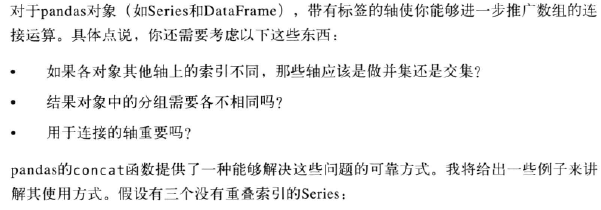

In [35]:
Image(filename="picture\Concatenation.png")

In [40]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

print s1
print s2
print s3

print pd.concat([s1,s2,s3]) # 将值和索引粘合在一起
print pd.concat([s1,s2,s3],axis = 1) 

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
f    5
g    6
dtype: int64
a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64
    0   1   2
a   0 NaN NaN
b   1 NaN NaN
c NaN   2 NaN
d NaN   3 NaN
e NaN   4 NaN
f NaN NaN   5
g NaN NaN   6


In [42]:
s4 = pd.concat([s1 * 5, s3])

print s4
print pd.concat([s1, s4], axis=1)
print pd.concat([s1, s4], axis=1, join='inner')
print pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

print result
print result.unstack()
print pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

a    0
b    5
f    5
g    6
dtype: int64
    0  1
a   0  0
b   1  5
f NaN  5
g NaN  6
   0  1
a  0  0
b  1  5
    0   1
a   0   0
c NaN NaN
b   1   5
e NaN NaN
one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64
        a   b   f   g
one     0   1 NaN NaN
two     0   1 NaN NaN
three NaN NaN   5   6
   one  two  three
a    0  NaN    NaN
b    1  NaN    NaN
c  NaN    2    NaN
d  NaN    3    NaN
e  NaN    4    NaN
f  NaN  NaN      5
g  NaN  NaN      6


In [43]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
 columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
 columns=['three', 'four'])

print df1
print df2

print pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])
print pd.concat({'level1': df1, 'level2': df2}, axis=1) # 传入 字典
print pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],names=['upper', 'lower']) # 层次化索引

   one  two
a    0    1
b    2    3
c    4    5
   three  four
a      5     6
c      7     8
  level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8
  level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8
upper level1     level2     
lower    one two  three four
a          0   1      5    6
b          2   3    NaN  NaN
c          4   5      7    8


In [44]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

print df1
print df2

print pd.concat([df1, df2], ignore_index=True)

          a         b         c         d
0 -0.237009  0.797732 -1.104794  0.008295
1 -0.439155 -0.467090  0.546519  0.561466
2 -2.011739 -0.410485 -1.439417  0.597892
          b         d         a
0 -1.189609  1.998985 -0.001541
1 -1.643742  0.506527 -0.328351
          a         b         c         d
0 -0.237009  0.797732 -1.104794  0.008295
1 -0.439155 -0.467090  0.546519  0.561466
2 -2.011739 -0.410485 -1.439417  0.597892
3 -0.001541 -1.189609       NaN  1.998985
4 -0.328351 -1.643742       NaN  0.506527


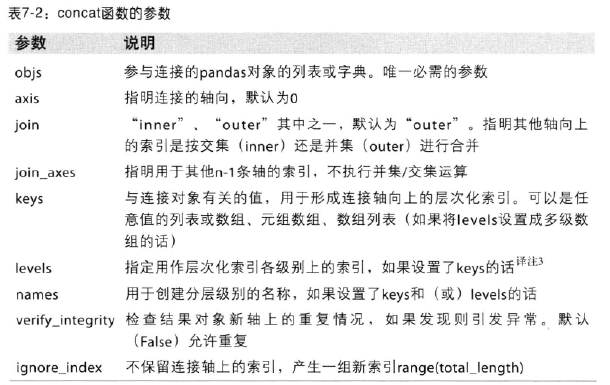

In [46]:
Image(filename="picture\Concatenation 2.png")

### 4 合并重叠数据

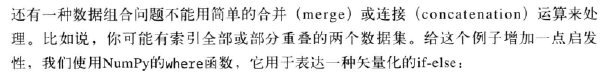

In [47]:
Image(filename="picture\Combining Data with Overlap.png")

In [51]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),index=['f', 'e', 'd', 'c', 'b', 'a'])

print a
print b

b[-1] = np.nan
print b

print b[:-2].combine_first(a[2:])

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64
f    0
e    1
d    2
c    3
b    4
a    5
dtype: float64
f     0
e     1
d     2
c     3
b     4
a   NaN
dtype: float64
a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64




In [52]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
 'b': [np.nan, 2., np.nan, 6.],
 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
 'b': [np.nan, 3., 4., 6., 8.]})

print df1
print df2
print df1.combine_first(df2)

    a   b   c
0   1 NaN   2
1 NaN   2   6
2   5 NaN  10
3 NaN   6  14
    a   b
0   5 NaN
1   4   3
2 NaN   4
3   3   6
4   7   8
   a   b   c
0  1 NaN   2
1  4   2   6
2  5   4  10
3  3   6  14
4  7   8 NaN


## 二、重塑和轴向旋转
* 重塑（reshape）、轴向旋转（pivot）

### 1 重塑层次化索引

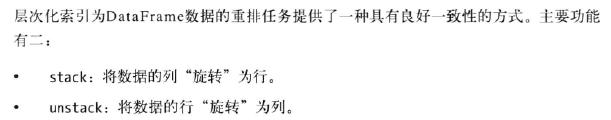

In [53]:
Image(filename="picture\Reshaping with Hierarchical Indexing.png")

In [55]:
data = DataFrame(np.arange(6).reshape((2, 3)),index=pd.Index(['Ohio', 'Colorado'], name='state'),
 columns=pd.Index(['one', 'two', 'three'], name='number'))

print data

result = data.stack() # 将列转成行，得到一个Series

print result
print result.unstack() # 重排为DataFrame
print result.unstack(0) # 默认操作最内层，传入分层级别的编号或名称即可对其进行其他级别的unstack操作
print result.unstack('state')

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32
number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
state   Ohio  Colorado
number                
one        0         3
two        1         4
three      2         5
state   Ohio  Colorado
number                
one        0         3
two        1         4
three      2         5


In [56]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])

print s1
print s2

data2 = pd.concat([s1, s2], keys=['one', 'two'])

print data2
print data2.unstack() # 如果找不到对应的值，unsatack操作引入NaN
print data2.unstack().stack() # stack默认滤除缺失数据，因此可逆
print data2.unstack().stack(dropna=False)

a    0
b    1
c    2
d    3
dtype: int64
c    4
d    5
e    6
dtype: int64
one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64
      a   b  c  d   e
one   0   1  2  3 NaN
two NaN NaN  4  5   6
one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: float64
one  a     0
     b     1
     c     2
     d     3
     e   NaN
two  a   NaN
     b   NaN
     c     4
     d     5
     e     6
dtype: float64


In [57]:
df = DataFrame({'left': result, 'right': result + 5},columns=pd.Index(['left', 'right'], name='side'))

print df

print df.unstack('state') # 旋转轴的级别将会成为结果中的最低级别
print df.unstack('state').stack('side')

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10
side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10
state         Ohio  Colorado
number side                 
one    left      0         3
       right     5         8
two    left      1         4
       right     6         9
three  left      2         5
       right     7        10


### 2 将‘长格式’旋转为‘宽格式’

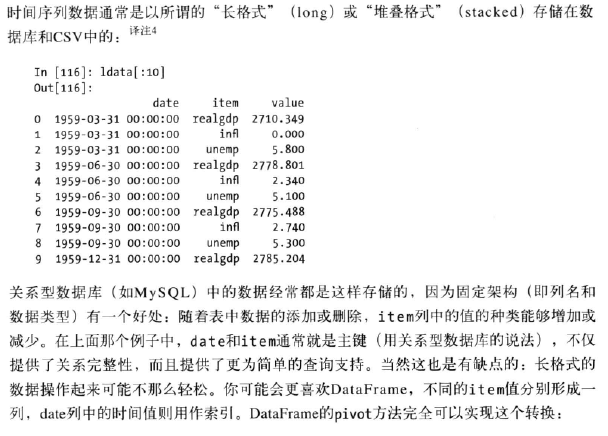

In [59]:
Image(filename="picture\Pivot.png")

In [ ]:
pivoted = ldata.pivot('date', 'item', 'value')

pivoted.head()

In [ ]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

pivoted = ldata.pivot('date', 'item')
pivoted[:5]
pivoted['value'][:5]

unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

## 三、数据转换
* 以上是数据的重排，还有就是过滤、清理以及转换

### 1 移除重复数据

In [60]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,'k2': [1, 1, 2, 3, 3, 4, 4]})

print data
print data.duplicated() # 返回一个布尔型Series，表示各行是否是重复行
print data.drop_duplicates() # 返回移除了重复行的DataFrame

    k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4
0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool
    k1  k2
0  one   1
2  one   2
3  two   3
5  two   4


In [62]:
data['v1'] = range(7)

print data
print data.drop_duplicates(['k1']) # 根据k1列过滤重复项
print data.drop_duplicates(['k1', 'k2'], keep='last') # 默认保留第一个出现的值，而keep='last'则保留最后一个

    k1  k2  v1
0  one   1   0
1  one   1   1
2  one   2   2
3  two   3   3
4  two   3   4
5  two   4   5
6  two   4   6
    k1  k2  v1
0  one   1   0
3  two   3   3
    k1  k2  v1
1  one   1   1
2  one   2   2
4  two   3   4
6  two   4   6


### 2 利用函数或映射进行数据转换

In [64]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
 'corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

print data

          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0


In [66]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}
data['animal'] = data['food'].map(str.lower).map(meat_to_animal) # 使大小写一致

print meat_to_animal,
print data

{'pastrami': 'cow', 'bacon': 'pig', 'pulled pork': 'pig', 'corned beef': 'cow', 'nova lox': 'salmon', 'honey ham': 'pig'}           food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon


In [67]:
data['food'].map(lambda x: meat_to_animal[x.lower()]) # map 可实现元素及转换以及其他数据清理工作
print data

          food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon


### 3 替换值

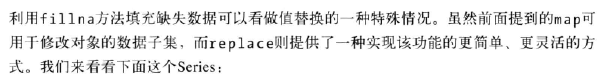

In [68]:
Image(filename="picture\Replacing Values.png")

In [69]:
data = Series([1., -999., 2., -999., -1000., 3.])

print data

print data.replace(-999, np.nan) # 将表示缺失值的-999，替换成pandas可识别的NA值
print data.replace([-999, -1000], np.nan) # 一次替换多个值
print data.replace([-999, -1000], [np.nan, 0]) # 不同的值不同的替换
print data.replace({-999: np.nan, -1000: 0}) # 参数为字典

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: float64
0       1
1     NaN
2       2
3     NaN
4   -1000
5       3
dtype: float64
0     1
1   NaN
2     2
3   NaN
4   NaN
5     3
dtype: float64
0     1
1   NaN
2     2
3   NaN
4     0
5     3
dtype: float64
0     1
1   NaN
2     2
3   NaN
4     0
5     3
dtype: float64


### 4 重命名轴索引

In [80]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])

print data
print
print data.index.map(str.upper) # 轴标签map方法

data.index = data.index.map(str.upper) # 赋值给index，从而修改DataFrame
print data

data.rename(index=str.title, columns=str.upper) # 创建数据集的转换版（而不是修改原始数据）
print data

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11

['OHIO' 'COLORADO' 'NEW YORK']
          one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11
          one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11


In [85]:
data.rename(index={'OHIO': 'INDIANA'},columns={'three': 'peekaboo'}) # 部分轴标签的更新
print data

_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True) # 修改某个数据集
print data

          one  two  three  four
INDIANA     0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11
          one  two  three  four
INDIANA     0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11


### 5 离散化和面元划分

In [94]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)

print cats
print cats.codes # 为年龄数据进行标号
print cats.categories # 分类名称  
print pd.value_counts(cats) # 方括号表示闭端（包括），圆括号表示开端

print pd.cut(ages, [18, 26, 36, 61, 100], right=False) # 开闭段可通过right=False修改

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
[0 0 0 1 0 0 2 1 3 2 2 1]
Index([u'(18, 25]', u'(25, 35]', u'(35, 60]', u'(60, 100]'], dtype='object')
(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64
[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, object): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]


In [92]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior'] 
print pd.cut(ages, bins, labels=group_names) # 设置分类名称

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]


In [95]:
data = np.random.rand(20)

print data
print pd.cut(data, 4, precision=2) # 传入数量，则会根据数据的最大值和最小值计算等长划分

[ 0.49310815  0.1331151   0.49398694  0.98552286  0.63745101  0.18213464
  0.38735829  0.79714897  0.03395903  0.92748342  0.28816111  0.95941326
  0.99310002  0.11728799  0.91049949  0.44507195  0.09913783  0.22878695
  0.61604196  0.16277338]
[(0.27, 0.51], (0.033, 0.27], (0.27, 0.51], (0.75, 0.99], (0.51, 0.75], ..., (0.27, 0.51], (0.033, 0.27], (0.033, 0.27], (0.51, 0.75], (0.033, 0.27]]
Length: 20
Categories (4, object): [(0.033, 0.27] < (0.27, 0.51] < (0.51, 0.75] < (0.75, 0.99]]


In [98]:
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # 根据样本分位数进行划分

# print data
print cats
print pd.value_counts(cats)
print pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]) # 自定义分位数

[(0.755, 3.338], (0.755, 3.338], (-0.599, 0.0743], (-0.599, 0.0743], [-3.0163, -0.599], ..., (0.0743, 0.755], (-0.599, 0.0743], (0.755, 3.338], (-0.599, 0.0743], (-0.599, 0.0743]]
Length: 1000
Categories (4, object): [[-3.0163, -0.599] < (-0.599, 0.0743] < (0.0743, 0.755] < (0.755, 3.338]]
(0.755, 3.338]       250
(0.0743, 0.755]      250
(-0.599, 0.0743]     250
[-3.0163, -0.599]    250
dtype: int64
[(1.338, 3.338], (0.0743, 1.338], (-1.319, 0.0743], (-1.319, 0.0743], [-3.0163, -1.319], ..., (0.0743, 1.338], (-1.319, 0.0743], (0.0743, 1.338], (-1.319, 0.0743], (-1.319, 0.0743]]
Length: 1000
Categories (4, object): [[-3.0163, -1.319] < (-1.319, 0.0743] < (0.0743, 1.338] < (1.338, 3.338]]


### 6 检测和过滤异常值

In [103]:
np.random.seed(12345)

data = DataFrame(np.random.randn(1000, 4))
print data.describe()

                 0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.067684     0.067924     0.025598    -0.002298
std       0.998035     0.992106     1.006835     0.996794
min      -3.428254    -3.548824    -3.184377    -3.745356
25%      -0.774890    -0.591841    -0.641675    -0.644144
50%      -0.116401     0.101143     0.002073    -0.013611
75%       0.616366     0.780282     0.680391     0.654328
max       3.366626     2.653656     3.260383     3.927528


In [104]:
col = data[3]
print col[np.abs(col) > 3] # 绝对值大于3

print data[(np.abs(data) > 3).any(1)] # 选出全部含有“超过3或-3的值”的行

data[np.abs(data) > 3] = np.sign(data) * 3 # 限制在区间-3 到3
print data.describe()

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64
            0         1         2         3
5   -0.539741  0.476985  3.248944 -1.021228
97  -0.774363  0.552936  0.106061  3.927528
102 -0.655054 -0.565230  3.176873  0.959533
305 -2.315555  0.457246 -0.025907 -3.399312
324  0.050188  1.951312  3.260383  0.963301
400  0.146326  0.508391 -0.196713 -3.745356
499 -0.293333 -0.242459 -3.056990  1.918403
523 -3.428254 -0.296336 -0.439938 -0.867165
586  0.275144  1.179227 -3.184377  1.369891
808 -0.362528 -3.548824  1.553205 -2.186301
900  3.366626 -2.372214  0.851010  1.332846
                 0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.067623     0.068473     0.025153    -0.002081
std       0.995485     0.990253     1.003977     0.989736
min      -3.000000    -3.000000    -3.000000    -3.000000
25%      -0.774890    -0.591841    -0.641675    -0.644144
50%      -0.116401     0.101143     0.002073    -0.0

### 7 排列和随机采样

In [106]:
df = DataFrame(np.arange(5 * 4).reshape(5, 4))
sampler = np.random.permutation(5) # 随机重排序

print sampler
print df
print df.take(sampler) # 用替换方式选取随机子集

print df.take(np.random.permutation(len(df))[:3])

[0 3 4 2 1]
    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19
    0   1   2   3
0   0   1   2   3
3  12  13  14  15
4  16  17  18  19
2   8   9  10  11
1   4   5   6   7
    0   1   2   3
3  12  13  14  15
4  16  17  18  19
2   8   9  10  11


In [107]:
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10) # 随机整数
draws = bag.take(sampler)

print bag
print sampler
print draws

[ 5  7 -1  6  4]
[3 2 1 2 0 4 4 4 3 4]
[ 6 -1  7 -1  5  4  4  4  6  4]


### 8 计算指标/哑变量

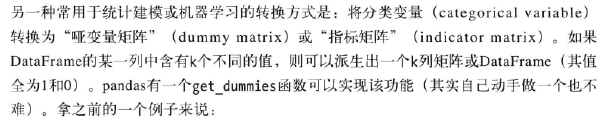

In [108]:
Image(filename="picture\Computing Indicator or Dummy Variables.png")

In [112]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],'data1': range(6)})

print df
print pd.get_dummies(df['key'])

dummies = pd.get_dummies(df['key'], prefix='key') # 列名加前缀
df_with_dummy = df[['data1']].join(dummies)

print dummies
print df_with_dummy

   data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   b
   a  b  c
0  0  1  0
1  0  1  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0
   key_a  key_b  key_c
0      0      1      0
1      0      1      0
2      1      0      0
3      0      0      1
4      1      0      0
5      0      1      0
   data1  key_a  key_b  key_c
0      0      0      1      0
1      1      0      1      0
2      2      1      0      0
3      3      0      0      1
4      4      1      0      0
5      5      0      1      0


In [ ]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch07/movies.dat', sep='::', header=None,names=mnames)
movies[:10]

In [ ]:
genre_iter = (set(x.split('|')) for x in movies.genres)

genres = sorted(set.union(*genre_iter))
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1
    
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.ix[0]

In [115]:
values = np.random.rand(10)
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

print values
print bins
print pd.get_dummies(pd.cut(values, bins))

[ 0.44740483  0.32410284  0.92360521  0.51923163  0.53105727  0.17332397
  0.34263784  0.1083731   0.9276808   0.18307257]
[0, 0.2, 0.4, 0.6, 0.8, 1]
   (0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1]
0         0           0           1           0         0
1         0           1           0           0         0
2         0           0           0           0         1
3         0           0           1           0         0
4         0           0           1           0         0
5         1           0           0           0         0
6         0           1           0           0         0
7         1           0           0           0         0
8         0           0           0           0         1
9         1           0           0           0         0


## 四、字符串操作

### 1 字符串对象方法

In [124]:
val = 'a,b, guido'

print val
print val.split(',')

pieces = [x.strip() for x in val.split(',')] # strip 用于修剪空白符（包括换行符）
print pieces

a,b, guido
['a', 'b', ' guido']
['a', 'b', 'guido']


In [126]:
first, second, third = pieces

print first + '::' + second + '::' + third
print '::'.join(pieces)

print 'guido' in val

a::b::guido
a::b::guido
True


In [127]:
print val.index(',')
print val.find(':') # 注意find和index的区别：找不到时，index引发异常
print val.count(',')

print val.replace(',', '::')
print val.replace(',', '')

1
-1
2
a::b:: guido
ab guido


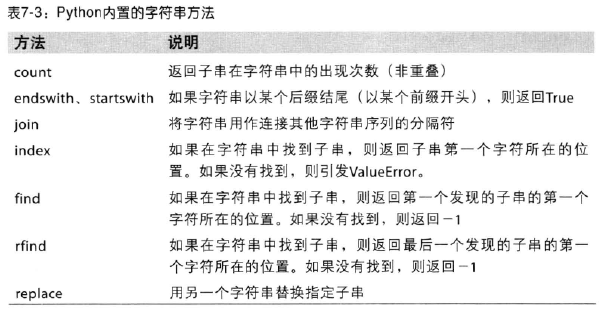

In [128]:
Image(filename="picture\Python built-in string methods.png")

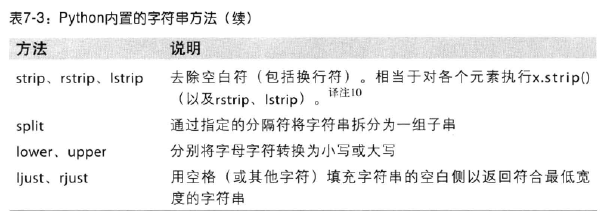

In [129]:
Image(filename="picture\Python built-in string methods 2.png")

### 2 正则表达式

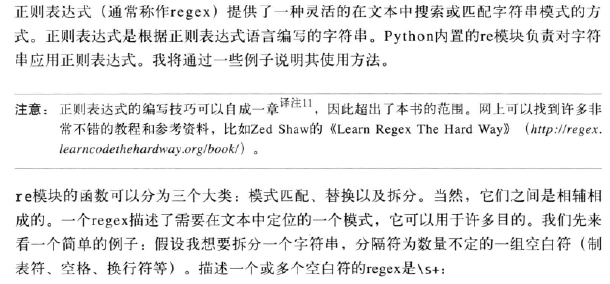

In [131]:
Image(filename="picture\Regular expressions.png")

In [134]:
text = "foo bar\t baz \tqux"

print text
print re.split('\s+', text)

regex = re.compile('\s+') # 编译regex以得到一个可重用的regex对象

print regex
print regex.split(text)
print regex.findall(text) # 只希望得到匹配regex的所有模式

foo bar	 baz 	qux
['foo', 'bar', 'baz', 'qux']
['foo', 'bar', 'baz', 'qux']
[' ', '\t ', ' \t']


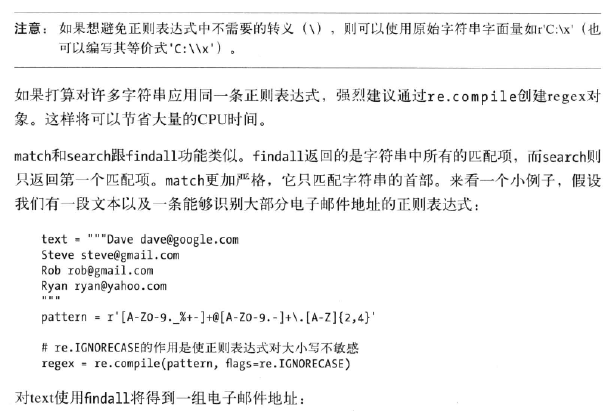

In [135]:
Image(filename="picture\Regular expressions 2.png")

In [142]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

print text
print regex
print regex.findall(text)

Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']


In [143]:
m = regex.search(text) # 返回文本中第一个电子邮件地址

print m
print text[m.start():m.end()]
print regex.match(text) # 只匹配出现在字符串开头的模式
print regex.sub('REDACTED', text) # 匹配到的模式替换为指定字符串

dave@google.com
None
Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [144]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})' # 将地址分为三部分：用户名、域名、域后缀
regex = re.compile(pattern, flags=re.IGNORECASE)
m = regex.match('wesm@bright.net')

print m
print m.groups() # 返回一个有模式各段组成的元组
print regex.findall(text) # 返回元组列表
print regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text) # 通过\1等特殊符号访问各匹配项中的分组

('wesm', 'bright', 'net')
[('dave', 'google', 'com'), ('steve', 'gmail', 'com'), ('rob', 'gmail', 'com'), ('ryan', 'yahoo', 'com')]
Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



In [145]:
regex = re.compile(r"""       
(?P<username>[A-Z0-9._%+-]+)
@
(?P<domain>[A-Z0-9.-]+)
\.
(?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE) # 为各个匹配分组加上一个名称

In [146]:
m = regex.match('wesm@bright.net')

print m
print m.groupdict()

{'username': 'wesm', 'domain': 'bright', 'suffix': 'net'}


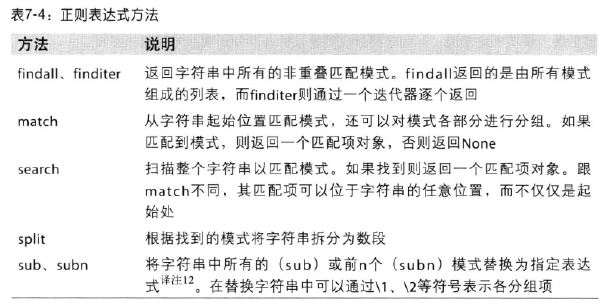

In [138]:
Image(filename="picture\Regular expressions 3.png")

### 3 pandas中矢量化的字符串函数

In [153]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com','Rob': 'rob@gmail.com', 'Wes': np.nan}
print data

data = Series(data)
print data
print data.isnull()

{'Steve': 'steve@gmail.com', 'Wes': nan, 'Dave': 'dave@google.com', 'Rob': 'rob@gmail.com'}
Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object
Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool


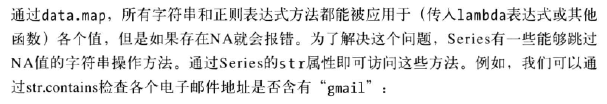

In [155]:
Image(filename="picture\Vectorized string functions in pandas.png")

In [156]:
print data.str.contains('gmail')

print pattern
print data.str.findall(pattern, flags=re.IGNORECASE) # 使用正则表达式

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object
([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})
Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object


In [151]:
matches = data.str.match(pattern, flags=re.IGNORECASE) # 实现矢量化元素获取操作
print matches
print matches.str.get(1) # 1 使用str.get
print matches.str[0] # 2 在str属性上使用索引
print data.str[:5] # 字串截取

Dave     (dave, google, com)
Rob        (rob, gmail, com)
Steve    (steve, gmail, com)
Wes                      NaN
dtype: object
Dave     google
Rob       gmail
Steve     gmail
Wes         NaN
dtype: object
Dave      dave
Rob        rob
Steve    steve
Wes        NaN
dtype: object
Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object


D:\software\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: In future versions of pandas, match will change to always return a bool indexer.
  if __name__ == '__main__':


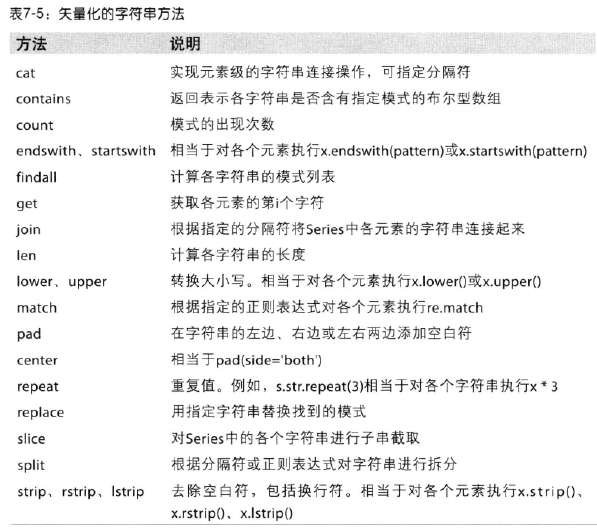

In [157]:
Image(filename="picture\Vectorized string functions in pandas 2.png")

### 4 示例：USDA食品数据库